In [2]:
from pbc.bragg_peak import BraggPeak
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate

In [3]:
with open("bp.csv", 'r') as bp_file:
    data = pd.read_csv(bp_file, sep=';')

x_peak = data[data.columns[0]].as_matrix()
y_peak = data[data.columns[1]].as_matrix()

In [4]:
spl = interpolate.InterpolatedUnivariateSpline(x_peak, y_peak, ext=3)

In [5]:
search_dom = np.arange(0, 30, 0.01)

In [6]:
res = spl(search_dom)

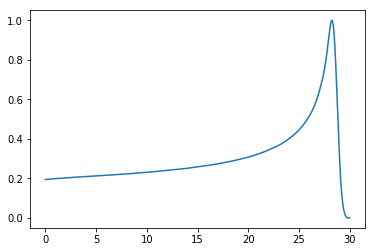

In [7]:
plt.plot(search_dom, res)
plt.show()

In [8]:
a = res[res > 0.9]

In [9]:
len(a)
a[0], a[-1]

(0.90307999999999988, 0.90461999999999743)

In [10]:
print(np.searchsorted(res, 0.8, side="left"))
print(np.searchsorted(res, 0.8, side="right"))

2766
2766


In [11]:
kle = np.extract(res > 0.9, res)
len(kle)

59

In [12]:
res.argmax()

2824

In [13]:
left = res[:res.argmax()]
right = res[res.argmax():]
merge_idx = res.argmax()

In [14]:
idx_left = np.searchsorted(left, 0.9, "left")
idx_left, left[idx_left]

(2791, 0.90307999999999988)

In [17]:
idx_right = np.searchsorted(right, 0.9, "right")
idx_right, right[idx_right-1]

(176, 0.00011)

In [18]:
i_left = (np.abs(left - 0.9)).argmin()
i_right = (np.abs(right - 0.9)).argmin()
i_left, i_right

(2790, 26)

In [19]:
left[i_left], right[i_right]

(0.8988000000000016, 0.89661999999999997)

In [20]:
res[merge_idx+i_right] == right[i_right]

True

In [50]:
def get_spread_idx(arr, val):
    """
    split in two parts to ensure we have 2 different points
    from left and right side of the peak
    """
    left = arr[:arr.argmax()]
    right = arr[arr.argmax():]
    merge_idx = arr.argmax()
    i_left = (np.abs(left - val)).argmin()
    i_right = (np.abs(right - val)).argmin()
    return i_left, merge_idx + i_right

In [51]:
get_spread_idx(res, 0.9)

(2790, 2850)

In [52]:
kle = np.array([0.2, 0.4, 0.6, 0.8, 1., 0.8, 0.6])

In [53]:
get_spread_idx(kle, 0.6), get_spread_idx(kle, 0.75), get_spread_idx(kle, 0.8)

((2, 6), (3, 5), (3, 5))

In [54]:
def get_90(arr):
    return get_spread_idx(arr, 0.9)

In [55]:
dom_kle = np.array([1, 2, 3, 4, 5, 6, 7])
kle_spl = interpolate.InterpolatedUnivariateSpline(dom_kle, kle, ext=3)

In [56]:
dd = np.arange(0, 35, 0.01)
ss = interpolate.InterpolatedUnivariateSpline(x_peak, y_peak, ext=3)

In [57]:
vv = ss(dd)

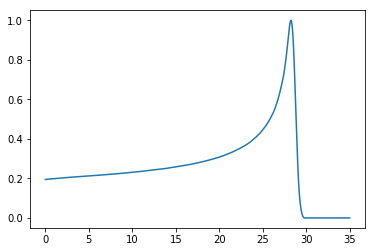

In [68]:
plt.plot(dd, vv)
plt.show()

In [69]:
ll, rr = get_90(vv)

In [70]:
ll, rr, dd[ll], dd[rr]

(2790, 2850, 27.900000000000002, 28.5)

In [71]:
def spread_90_domain_vals(x_arr):
    ll, rr = get_90(x_arr)
    return x_arr[ll], x_arr[rr]

In [74]:
ll, rr = get_90(vv)

In [76]:
dd[ll], dd[rr]

(27.900000000000002, 28.5)